In [1]:
import os
import pickle as pickle
import tensorflow as tf
import numpy as np
from Simulation import buffer_simulation, save_obj, load_obj
import pandas as pd
from datetime import datetime
from pandas import ExcelWriter
from openpyxl import Workbook
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.ticker as ticker
from pylab import *
from IPython.display import display,HTML
import cufflinks as cf
import plotly.offline as py



In [19]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [22]:
from pandas import ExcelWriter
from openpyxl import Workbook

In [23]:
datos  = pd.read_excel('MoRS\Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Grafics.xlsx',sheet_name='graficar')
tabla= datos.set_index("Voltajes")
tabla
df_tabla = pd.DataFrame(tabla)
df_tabla

,E,FlipPatch,% Fallos,Unnamed: 4,Unnamed: 5,Fallos
Voltajes,,,,,,
0.51,0.146796,0.150776,70.567799,NaN,NaN,739957
0.52,0.172146,0.248765,25.295067,NaN,NaN,265238
0.53,0.331850,0.636760,6.905365,NaN,1048576.0,72408
0.54,0.585180,0.982999,1.126957,NaN,NaN,11817
0.55,0.645479,1.000000,0.304317,NaN,NaN,3191
0.56,0.712090,1.000000,0.107384,NaN,NaN,1126
0.57,0.844462,1.000000,0.032139,NaN,NaN,337
0.58,0.999558,1.000000,0.005341,NaN,NaN,56
0.59,0.999558,1.000000,0.000572,NaN,NaN,6


C:\Users\usuario\AppData\Local\Temp\ipykernel_45524\593201141.py:93: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



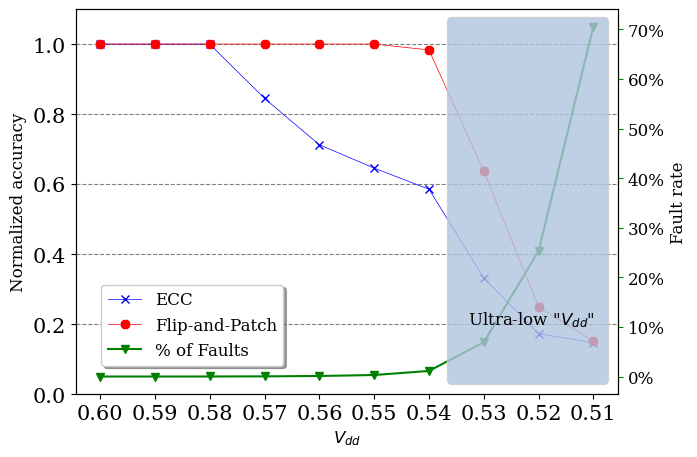

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [34]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches
from matplotlib.lines import Line2D

#from datetime import datetime
import time
mpl.rcParams['font.family']='serif'



l='0.5'
marksize=6

x=datos["Voltajes"]
y1 = 0.05 * x**2
y2 = 1 *y1


plt.rcParams.update({'font.size': 15})
fig1, ax1 = plt.subplots(figsize=(7,5))
#x_rect = 0.5
#y_rect = 0.5
#width_rect =0.5
#height_rect = 0.1
#
## Crear el cuadro transparente en el primer eje
#rect = plt.Rectangle((x_rect, y_rect), width_rect, height_rect, linewidth=1, edgecolor='g', facecolor='none', alpha=0.5)
#
## Agregar el cuadro al primer eje
#ax1.add_patch(rect)

ax2 = ax1.twinx()





#ax1= fig.add_subplot(1,3,1)
x_values = range(len(x))


#plt.ylabel('Normalized accuracy', fontsize=12,  fontfamily="serif")

#ax1.yaxis.set_label_position("left")
#ax1.yaxis.tick_left()
#ax2.yaxis.set_label_position("right")
ax1.set_ylabel('Normalized accuracy', fontsize=12,  fontfamily="serif")
ax2.set_ylabel('Fault rate', fontsize=12,  fontfamily="serif")
ax1.set_xlabel("$V_{dd}$", fontsize=12,  fontfamily="serif")
#ax2.yaxis.tick_right()


ax1.set_xticks([0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60],labelsize=12,fontfamily="serif") 
#ax2.set_xticks([6.9,1.12,0.30,0.10,0.03,0.005,0.0005,0.0001]) 

#ax1.tick_params(axis="x",labelsize=12,fontfamily="serif") 
#plt.xticks(x, tabla.index, fontsize= 12, fontfamily="serif" )
plt.yticks( fontsize= 12, fontfamily="serif" )
#ax2.set_ylim(0,  8.1)
ax1.set_ylim(0,1.1)
#ax1.set_title(" ECC vs Baseline SqueezeNet")
ax1.invert_xaxis()


ax1.plot(tabla["E"], label='ECC', color='b', ls='-', lw=l, marker='x', markersize=marksize)
ax1.plot(tabla["FlipPatch"], label='Flip-and-Patch', color='r', ls='-', lw=l, marker='8', markersize=marksize)
Extra=ax2.plot(tabla["% Fallos"] ,label='% of Faults', color='g', ls='-',marker='v', markersize=marksize)
#ax1.plot(tabla["FlipPatch_0.53"], label='FlipPatch 0.53 V', color="b", ls='-', lw=l, marker='x', markersize=marksize)
#ax1.plot(tabla["FlipPatch_0.54"], label='FlipPatch 0.54 V', color="r", ls='-', lw=l, marker='8', markersize=marksize)
#ax1.grid(axis='y', color = 'gray', linestyle = 'dashed')
#ax1.grid(axis='x', color = 'gray', linestyle = 'dashed')
# Definir las coordenadas del cuadro y su tamaño


ax1.yaxis.grid(color='gray', linestyle='dashed')
#ax2.yaxis.grid(color='g', linestyle='dashed')


def porcentaje_formatter(x, pos):
    return f'{x:.0f}%'

# Aplicar la función de formateo al eje y
formatter = FuncFormatter(porcentaje_formatter)
ax2.yaxis.set_major_formatter(formatter)
#line1.set_marker(None)
ax2.tick_params(axis='y', color='g')
#legend1= ax2.legend(handles=[Extra],loc='lower right',labels=[],handlelength=0, handleheight=25.5,facecolor='lightsteelblue')
custom_legend = [Line2D([], [], linestyle='-')]
legend1= ax2.legend(custom_legend, [''],handles=[Extra],loc='lower right',labels=[],handlelength=0, handleheight=25.5,facecolor='lightsteelblue')

# Agregar texto personalizado a la leyenda

texto_personalizado = 'Ultra-low "$V_{dd}$"'
texto_obj = legend1.texts[0]
texto_obj.set_text(texto_personalizado)
texto_obj.set_position((-4.0, -130))
texto_obj.set_fontsize(12)

# Definir la posición del texto
#texto_obj.set_position((0.1, 0.1))
#for text in legend1.get_texts():
    #text.set_visible(False)
    
fig1.legend(fontsize=12,bbox_to_anchor=(0.15,0.15),loc ="lower left", shadow = True)



#plt.text(1, 1, 'alexnet', fontsize=13.5, fontfamily="serif")
#ax1.text(-1, 5, '0,0005', fontsize=13.5, fontfamily="serif")
#ax1.text(5.8, -0.24, '0,005', fontsize=13.5, fontfamily="serif")
#plt.text(8.6,-0.24, '0,032', fontsize=13.5, fontfamily="serif")
#plt.text(12.2, -0.24, '0,30', fontsize=13.5, fontfamily="serif")
#plt.text(15.45, -0.24, '1,12', fontsize=13.5, fontfamily="serif")
#plt.text(18.2, -0.24, '6,9', fontsize=13.5, fontfamily="serif")
#
#plt.legend(  fontsize=11, bbox_to_anchor=(0.653,0.2),shadow = True)
#prop={'size':15}



plt.savefig('Acc_by_fault_rate_mod.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#
plt.tight_layout()





plt.show

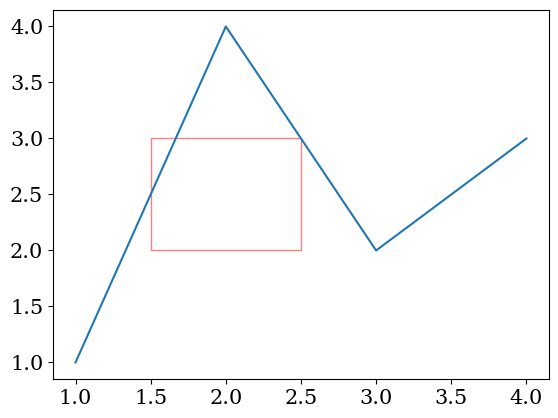

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Crear una figura
fig, ax = plt.subplots()

# Dibujar algo en la figura (por ejemplo, un círculo)
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

# Definir las coordenadas del cuadro y su tamaño
x = 1.5
y = 2
width = 1
height = 1

# Crear el cuadro transparente
rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none', alpha=0.5)

# Añadir el cuadro a la figura
ax.add_patch(rect)

plt.show()

In [127]:
import pandas as pd
acc_low_and_high=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/ACC_tipo_palabras_tecnicas.xlsx',sheet_name='xsiacaso', usecols=["Tecnic" ,"0.53 V","0.52 V","0.51 V"])
acc_low_and_high= acc_low_and_high.set_index("Tecnic")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
acc_low_and_high
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])


,0.51 V,0.52 V,0.53 V
Tecnic,,,
L&H,0.131737,0.197305,0.671856
L+f(H),0.966168,0.024850,0.009581
L&H,0.128467,0.311825,0.560584
L+f(H),0.998248,0.002336,0.002190
L&H,0.171875,0.000000,0.269271
L+f(H),0.280702,0.214536,0.391980
L&H,0.139183,0.000000,0.775189
L+f(H),0.813918,0.027837,0.145991
L&H,0.197537,0.301478,0.497537


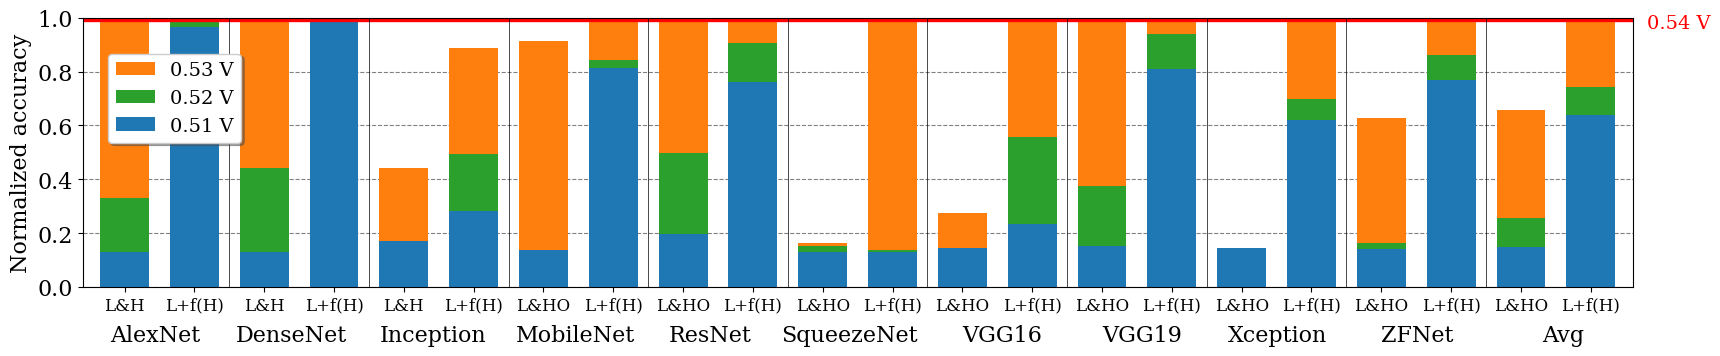

In [328]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
n = len(acc_low_and_high.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
#coloresRedes = ['#ff7f0e', 'green','dodgerblue']
#coloresRedes = ['#ffbb78', '#1f77b4','#7f7f7f']
coloresRedes = ['#1f77b4', '#2ca02c', '#ff7f0e']
#coloresRedes = ['#d62728', '#2ca02c', '#9467bd']
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

bars=acc_low_and_high.plot(kind ='bar' ,stacked = True,width = 0.70, color = coloresRedes,
                          figsize=(20,3.5),  zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Normalized accuracy', fontsize=16, fontfamily="serif")
plt.xticks(x, acc_low_and_high.index, fontsize= 8, fontfamily="serif" )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0,1)
#bars.set_ylim(bottom=0, top=3)

plt.xticks(rotation = 0, fontsize=12)
plt.yticks(rotation = 0, fontsize=16)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')



handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
legend1=plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=14,loc ="lower left",
           bbox_to_anchor=(0.01,0.5),shadow = True)

#plt.legend(fontsize=14,loc ="lower left", shadow = True)
#["0.58","0.56","0.54"]

plt.text(-0.2, -0.2, 'AlexNet', fontsize=16, fontfamily="serif")
plt.text(1.6, -0.2, 'DenseNet', fontsize=16, fontfamily="serif")
plt.text(3.65, -0.2, 'Inception', fontsize=16, fontfamily="serif")
plt.text(5.6, -0.2, 'MobileNet', fontsize=16, fontfamily="serif")
plt.text(7.8, -0.2, 'ResNet', fontsize=16, fontfamily="serif")
plt.text(9.4,-0.2, 'SqueezeNet', fontsize=16, fontfamily="serif")
plt.text(12, -0.2, 'VGG16', fontsize=16, fontfamily="serif")
plt.text(14.0, -0.2, 'VGG19', fontsize=16, fontfamily="serif")
plt.text(15.8, -0.2,'Xception' , fontsize=16, fontfamily="serif")
plt.text(18.0, -0.2, 'ZFNet', fontsize=16, fontfamily="serif")
plt.text(20.3, -0.2, 'Avg', fontsize=16, fontfamily="serif")

#plt.axhline(y=50, color='r', linestyle='--')
#plt.axhline(y=1, color='red', linestyle='-', label='0.54 V')

plt.text(21.8, 0.96, '0.54 V', fontsize=14, fontfamily="serif",color="red")
plt.axhline(y=1, color="red",linestyle='-',linewidth=6,label='0.54 V')#Alex
#legend2 = plt.legend(['0.54 V'], loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.89))
#custom_legend = [Line2D([0], [0], color='red', lw=1.7, label='0.54 V')]
#plt.legend(handles=custom_legend, loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.875),shadow = True)
#plt.gca().add_artist(legend1)
plt.axvline(x=1.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=3.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=7.5, ymax= 5, color="black",linewidth=0.5)#mobil
plt.axvline(x=9.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=13.5, ymax= 5, color="black",linewidth=0.5)#vgg16
plt.axvline(x=15.5, ymax= 5, color="black",linewidth=0.5)#vgg19
plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#xcep
plt.axvline(x=19.5, ymax= 5, color="black",linewidth=0.5)#zf
plt.savefig('acc_high_order_scratch_stacked_.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)

In [112]:
import pandas as pd
acc_by_tech=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols.xlsx',sheet_name='Hoja2', usecols=["Redes","Tecnic" ,"0.53 V","0.52 V","0.51 V"])
acc_by_tech= acc_by_tech.set_index("Tecnic")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
#acc_by_tech
#df = pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols.xlsx',sheet_name='Hoja2')
df = pd.DataFrame(acc_by_tech)
# Extraer los datos de la columna 'Columna1'
#Tecnic = df['Tecnic']
#Redes  = df['Redes']
#columnas_seleccionadas = df.iloc[ [2, 3, 4]]  
#ACC=df["0.53 V","0.52 V","0.51 V"]
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])
acc_by_tech

,Redes,0.51 V,0.52 V,0.53 V
Tecnic,,,,
Base,Alex,0.149701,0.011078,0.044760
FaP,NaN,0.131737,0.196407,0.673353
SaS,NaN,0.985629,0.011377,0.001946
Base,Dense,0.128175,0.000292,0.004088
FaP,NaN,0.128467,0.308029,0.563358
SaS,NaN,0.981314,0.012409,0.006131
Base,Inception,0.165414,0.000000,0.000000
FaP,NaN,0.165414,0.000000,0.190977
SaS,NaN,0.855138,0.055138,0.033083


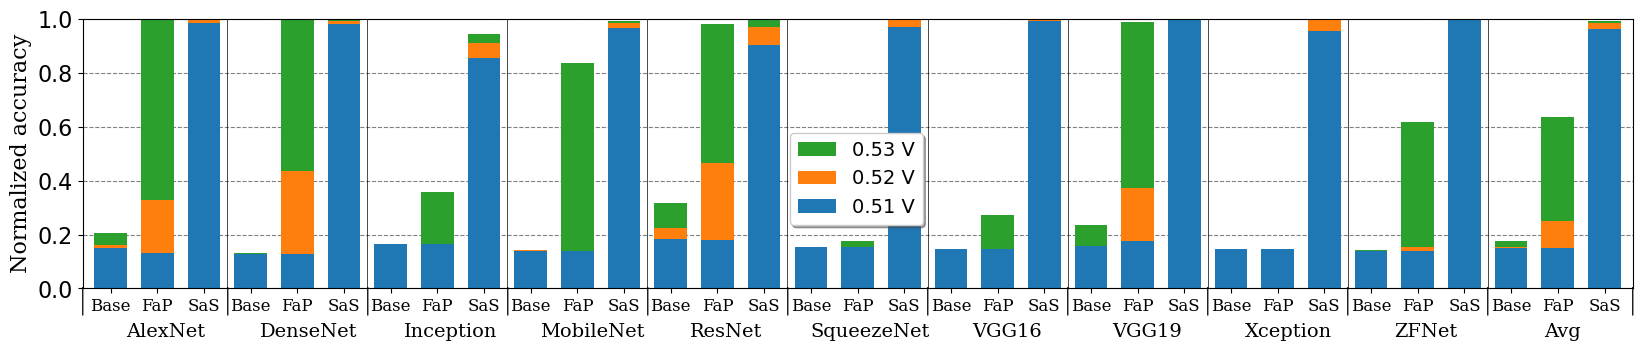

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
n = len(acc_by_tech.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
#coloresRedes = ['#ff7f0e', 'green','dodgerblue']
#coloresRedes = ['#ffbb78', '#1f77b4','#7f7f7f']
coloresRedes = ['#1f77b4','#ff7f0e', '#2ca02c' ]
#coloresRedes = ['#d62728', '#2ca02c', '#9467bd']
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

bars=acc_by_tech.plot(kind ='bar' ,stacked = True,width = 0.70, color = coloresRedes,
                          figsize=(20,3.5),  zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Normalized accuracy', fontsize=16, fontfamily="serif")
plt.xticks(x, acc_by_tech.index, fontsize= 12, fontfamily="serif" )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0,1)
#bars.set_ylim(bottom=0, top=3)

plt.xticks(rotation = 0)
plt.yticks(rotation = 0, fontsize=16)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')
#plt.xticks([])




handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
legend1=plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=14,loc ="lower left",
           bbox_to_anchor=(0.45,0.2),shadow = True)

#plt.legend(fontsize=14,loc ="lower left", shadow = True)
#["0.58","0.56","0.54"]



#plt.axhline(y=50, color='r', linestyle='--')
#plt.axhline(y=1, color='red', linestyle='-', label='0.54 V')

#plt.text(15, 0.86, '0.54 V', fontsize=14, fontfamily="serif",color="red")
#plt.axhline(y=1, color="red",linestyle='-',linewidth=6,label='0.54 V')#Alex


plt.text(0.34, -0.18, 'AlexNet', fontsize=14, fontfamily="serif")
plt.text(3.2, -0.18, 'DenseNet', fontsize=14, fontfamily="serif")
plt.text(6.28, -0.18, 'Inception', fontsize=14, fontfamily="serif")
plt.text(9.2, -0.18, 'MobileNet', fontsize=14, fontfamily="serif")
plt.text(12.4, -0.18, 'ResNet', fontsize=14, fontfamily="serif")
plt.text(15.,-0.18, 'SqueezeNet', fontsize=14, fontfamily="serif")
plt.text(18.45, -0.18, 'VGG16', fontsize=14, fontfamily="serif")
plt.text(21.45, -0.18, 'VGG19', fontsize=14, fontfamily="serif")
plt.text(24.3, -0.18,'Xception' , fontsize=14, fontfamily="serif")
plt.text(27.5, -0.18, 'ZFNet', fontsize=14, fontfamily="serif")
plt.text(30.7, -0.18, 'Avg', fontsize=14, fontfamily="serif")

plt.text(-0.69, -0.073, '|', fontsize=20, fontweight='ultralight')
plt.text(2.4, -0.073, '|', fontsize=20, fontweight='ultralight')
plt.text(5.4, -0.073, '|', fontsize=20, fontweight='ultralight')
plt.text(8.4, -0.073, '|', fontsize=20, fontweight='ultralight')
plt.text(11.4, -0.073, '|', fontsize=20, fontweight='ultralight')
plt.text(14.4, -0.073, '|', fontsize=20, fontweight='ultralight')
plt.text(17.4, -0.073, '|', fontsize=20, fontweight='ultralight')
plt.text(20.4, -0.073, '|', fontsize=20, fontweight='ultralight')
plt.text(23.4, -0.073, '|', fontsize=20, fontweight='ultralight')
plt.text(26.4, -0.073, '|', fontsize=20, fontweight='ultralight')
plt.text(29.4, -0.073, '|', fontsize=20, fontweight='light')
plt.text(32.5, -0.073, '|', fontsize=20, fontweight='ultralight')

#legend2 = plt.legend(['0.54 V'], loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.89))
#custom_legend = [Line2D([0], [0], color='red', lw=1.7, label='0.54 V')]
#plt.legend(handles=custom_legend, loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.875),shadow = True)
#plt.gca().add_artist(legend1)
plt.axvline(x=2.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=8.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#mobil
plt.axvline(x=14.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=20.5, ymax= 5, color="black",linewidth=0.5)#vgg16
plt.axvline(x=23.5, ymax= 5, color="black",linewidth=0.5)#vgg19
plt.axvline(x=26.5, ymax= 5, color="black",linewidth=0.5)#xcep
plt.axvline(x=29.5, ymax= 5, color="black",linewidth=0.5)#zf
plt.savefig('Mors_acc_by_tech_.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)

## Todo en matplotlip

In [1]:
import pandas as pd
acc_by_tech=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols.xlsx',sheet_name='Hoja3', usecols=["Redes","Tecnic" ,"0.53 V","0.52 V","0.51 V"])
#acc_by_tech= acc_by_tech.set_index("Redes")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
#acc_by_tech
#df = pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols.xlsx',sheet_name='Hoja2')
df = pd.DataFrame(acc_by_tech)
df

,Redes,Tecnic,0.53 V,0.52 V,0.51 V
0,Alex,Base,0.149701,0.011078,0.044760
1,NaN,F+P,0.131737,0.196407,0.673353
2,NaN,SP+S,0.985629,0.011377,0.001946
3,Dense,Base,0.128175,0.000292,0.004088
4,NaN,F+P,0.128467,0.308029,0.563358
5,NaN,SP+S,0.981314,0.012409,0.006131
6,Inception,Base,0.165414,0.000000,0.000000
7,NaN,F+P,0.165414,0.000000,0.190977
8,NaN,SP+S,0.855138,0.055138,0.033083
9,Mobile,Base,0.137670,0.003782,-0.002269


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Supongamos que tienes tres DataFrames llamados df1, df2 y df3, con la misma estructura

# Creamos un DataFrame con datos ficticios para ilustrar el ejemplo
#data1 = {'Categoría': ['A', 'B', 'C'], 'Valor': [10, 20, 30]}
#data2 = {'Categoría': ['A', 'B', 'C'], 'Valor': [15, 25, 35]}
#data3 = {'Categoría': ['A', 'B', 'C'], 'Valor': [12, 22, 32]}

#df1 = pd.DataFrame(vol_53)
#df2 = pd.DataFrame(vol_52)
#df3 = pd.DataFrame(vol_51)

# Creamos una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(15, 3))
plt.rc('font', size=12)

# Definimos la cantidad de barras
#n = len(df1)
#n_groups = n // 3
#rint(n_groups)

# Ancho de las barras
width = 0.7
plt.ylim(0,1.0)
# Índices para la posición de las barras
#n= vol_53.set_index(df['redes']"re)
#vol_53
ind = range(33)
y = ['Alex', 'Dense', 'Inception', 'MobileNet', 'ResNet', 'SqueezeNet', 'VGG16', 'VGG19', 'Xception','ZFNet','Avg']
print(ind)
#hatches = ['/', '\\', '|']
# Graficamos los datos de cada DataFrame
plt.ylabel('Normalized accuracy', fontsize=16, fontfamily="serif")

ax.bar(ind, df['0.53 V'], width, label='0.51 V')
ax.bar(ind, df['0.52 V'], width, bottom=df['0.53 V'], label='0.52 V')
ax.bar(ind, df['0.51 V'], width, bottom=df['0.53 V']+df['0.52 V'], label='0.53 V')







# Mostrar el gráfico

#for i in range(n_groups):
#    bottom_offset = i * 3 * width
#    hatch_index = i % len(hatches)  # Para seleccionar el patrón correcto
#    ax.bar(ind + i * width, df1['Valor'][i*3:i*3+3], width, label='DF1', bottom=bottom_offset, hatch=hatches[hatch_index])
#    ax.bar(ind + i * width, df2['Valor'][i*3:i*3+3], width, label='DF2', bottom=bottom_offset, hatch=hatches[hatch_index])
#    ax.bar(ind + i * width, df3['Valor'][i*3:i*3+3], width, label='DF3', bottom=bottom_offset, hatch=hatches[hatch_index])


#for i in range(n_groups):
#    print(i)
#    bottom_offset = i * 3 * width
#    ax.bar(ind + i * width, df['0.53 V'][i*3:i*3+3], width, label='DF1', bottom=bottom_offset)
#    ax.bar(ind + i * width, df['0.52 V'][i*3:i*3+3], width, label='DF2', bottom=bottom_offset)
#    ax.bar(ind + i * width, df['0.51 V'][i*3:i*3+3], width, label='DF3', bottom=bottom_offset)

# Configuramos las etiquetas de las categorías en el eje x

#ax.set_xticklabels(df1['Categoría'])


# Configuramos las etiquetas de las categorías en el eje x
#ax.set_xticks(ind,fontsize= 30, fontfamily="serif")
##ax.set_xticklabels(df['Redes'],fontsize= 12, fontfamily="serif")
#
#
# Añadimos leyenda

#ax.legend()
ax.set_xticks([])
handles, labels = plt.gca().get_legend_handles_labels()
##specify order of items in legend
order = [2,1,0]
##add legend to plot
legend1=plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=12,loc ="lower left",
           bbox_to_anchor=(0.45,0.2),shadow = True)


patrones = [Patch(facecolor='none', edgecolor='black', hatch='o'),
            Patch(facecolor='none', edgecolor='black', hatch='.'),
            Patch(facecolor='none', edgecolor='black', hatch='/')]
nombres_patrones = ['Base', 'F+P', 'SP+S']

# Aplicar los patrones a las barras en un ciclo
for i, bar in enumerate(ax.patches):
    patron_index = i % len(patrones)  # Determinar qué patrón aplicar
    bar.set_hatch(patrones[patron_index].get_hatch())  # Aplicar el patrón
    bar.set_edgecolor(patrones[patron_index].get_edgecolor())  # Mantener el color original de la barra
    bar.set_linewidth(0.5)  # Establecer un ancho de borde delgado
    

legend_patrones = plt.legend(handles=patrones,labels=nombres_patrones, fontsize=12,loc ="upper left",shadow = True, title='Technique')
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend_patrones) 

plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
# Mostramos el gráfico
#plt.text(14.5, 0.86, '0.54 V', fontsize=12, fontfamily="serif",color="red")
#plt.axhline(y=1, color="red",linestyle='-',linewidth=4,label='0.54 V')#Alex
plt.text(0.1, -0.1, 'AlexNet', fontsize=11, fontfamily="serif")
plt.text(2.8, -0.1, 'DenseNet', fontsize=11, fontfamily="serif")
plt.text(5.8, -0.1, 'Inception', fontsize=11, fontfamily="serif")
plt.text(8.8, -0.1, 'MobileNet', fontsize=11, fontfamily="serif")
plt.text(12.2, -0.1, 'ResNet', fontsize=11, fontfamily="serif")
plt.text(14.5,-0.1, 'SqueezeNet', fontsize=11, fontfamily="serif")
plt.text(18.2, -0.1, 'VGG16', fontsize=11, fontfamily="serif")
plt.text(21.0, -0.1, 'VGG19', fontsize=11, fontfamily="serif")
plt.text(23.8, -0.1,'Xception' , fontsize=11, fontfamily="serif")
plt.text(27.0, -0.1, 'ZFNet', fontsize=11, fontfamily="serif")
plt.text(30.4, -0.1, 'Avg', fontsize=11, fontfamily="serif")
plt.savefig('Mors_acc_by_tech_.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

## # Tramas con colores 

range(0, 33)


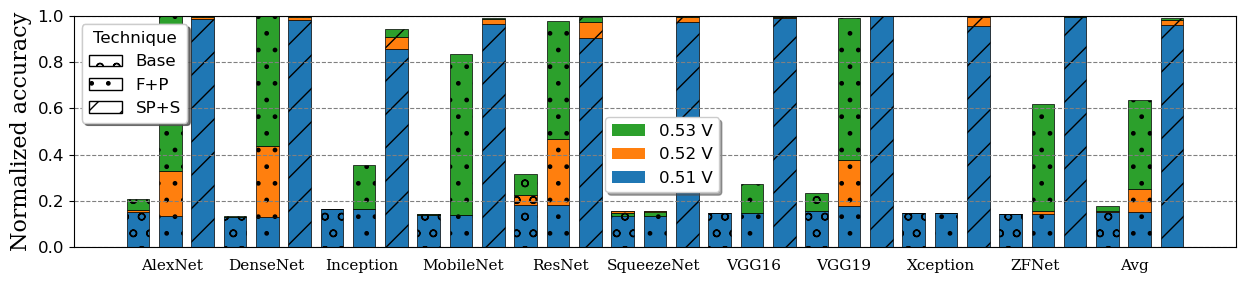

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Supongamos que tienes tres DataFrames llamados df1, df2 y df3, con la misma estructura

# Creamos un DataFrame con datos ficticios para ilustrar el ejemplo
#data1 = {'Categoría': ['A', 'B', 'C'], 'Valor': [10, 20, 30]}
#data2 = {'Categoría': ['A', 'B', 'C'], 'Valor': [15, 25, 35]}
#data3 = {'Categoría': ['A', 'B', 'C'], 'Valor': [12, 22, 32]}

#df1 = pd.DataFrame(vol_53)
#df2 = pd.DataFrame(vol_52)
#df3 = pd.DataFrame(vol_51)

# Creamos una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(15, 3))
plt.rc('font', size=12)

# Definimos la cantidad de barras
#n = len(df1)
#n_groups = n // 3
#rint(n_groups)

# Ancho de las barras
width = 0.7
plt.ylim(0,1.0)
# Índices para la posición de las barras
#n= vol_53.set_index(df['redes']"re)
#vol_53
ind = range(33)
y = ['Alex', 'Dense', 'Inception', 'MobileNet', 'ResNet', 'SqueezeNet', 'VGG16', 'VGG19', 'Xception','ZFNet','Avg']
print(ind)
#hatches = ['/', '\\', '|']
# Graficamos los datos de cada DataFrame
plt.ylabel('Normalized accuracy', fontsize=16, fontfamily="serif")

ax.bar(ind, df['0.53 V'], width, label='0.51 V')
ax.bar(ind, df['0.52 V'], width, bottom=df['0.53 V'], label='0.52 V')
ax.bar(ind, df['0.51 V'], width, bottom=df['0.53 V']+df['0.52 V'], label='0.53 V')







# Mostrar el gráfico

#for i in range(n_groups):
#    bottom_offset = i * 3 * width
#    hatch_index = i % len(hatches)  # Para seleccionar el patrón correcto
#    ax.bar(ind + i * width, df1['Valor'][i*3:i*3+3], width, label='DF1', bottom=bottom_offset, hatch=hatches[hatch_index])
#    ax.bar(ind + i * width, df2['Valor'][i*3:i*3+3], width, label='DF2', bottom=bottom_offset, hatch=hatches[hatch_index])
#    ax.bar(ind + i * width, df3['Valor'][i*3:i*3+3], width, label='DF3', bottom=bottom_offset, hatch=hatches[hatch_index])


#for i in range(n_groups):
#    print(i)
#    bottom_offset = i * 3 * width
#    ax.bar(ind + i * width, df['0.53 V'][i*3:i*3+3], width, label='DF1', bottom=bottom_offset)
#    ax.bar(ind + i * width, df['0.52 V'][i*3:i*3+3], width, label='DF2', bottom=bottom_offset)
#    ax.bar(ind + i * width, df['0.51 V'][i*3:i*3+3], width, label='DF3', bottom=bottom_offset)

# Configuramos las etiquetas de las categorías en el eje x

#ax.set_xticklabels(df1['Categoría'])


# Configuramos las etiquetas de las categorías en el eje x
#ax.set_xticks(ind,fontsize= 30, fontfamily="serif")
##ax.set_xticklabels(df['Redes'],fontsize= 12, fontfamily="serif")
#
#
# Añadimos leyenda

#ax.legend()
ax.set_xticks([])
handles, labels = plt.gca().get_legend_handles_labels()
##specify order of items in legend
order = [2,1,0]
##add legend to plot
legend1=plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=12,loc ="lower left",
           bbox_to_anchor=(0.45,0.2),shadow = True)


patrones = [Patch(facecolor='none', edgecolor='black', hatch='o'),
            Patch(facecolor='none', edgecolor='black', hatch='.'),
            Patch(facecolor='none', edgecolor='black', hatch='/')]
nombres_patrones = ['Base', 'F+P', 'SP+S']

# Aplicar los patrones a las barras en un ciclo
for i, bar in enumerate(ax.patches):
    patron_index = i % len(patrones)  # Determinar qué patrón aplicar
    bar.set_hatch(patrones[patron_index].get_hatch())  # Aplicar el patrón
    bar.set_edgecolor(patrones[patron_index].get_edgecolor())  # Mantener el color original de la barra
    bar.set_linewidth(0.5)  # Establecer un ancho de borde delgado
    

legend_patrones = plt.legend(handles=patrones,labels=nombres_patrones, fontsize=12,loc ="upper left",shadow = True, title='Technique')
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend_patrones) 

plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
# Mostramos el gráfico
#plt.text(14.5, 0.86, '0.54 V', fontsize=12, fontfamily="serif",color="red")
#plt.axhline(y=1, color="red",linestyle='-',linewidth=4,label='0.54 V')#Alex
plt.text(0.1, -0.1, 'AlexNet', fontsize=11, fontfamily="serif")
plt.text(2.8, -0.1, 'DenseNet', fontsize=11, fontfamily="serif")
plt.text(5.8, -0.1, 'Inception', fontsize=11, fontfamily="serif")
plt.text(8.8, -0.1, 'MobileNet', fontsize=11, fontfamily="serif")
plt.text(12.2, -0.1, 'ResNet', fontsize=11, fontfamily="serif")
plt.text(14.5,-0.1, 'SqueezeNet', fontsize=11, fontfamily="serif")
plt.text(18.2, -0.1, 'VGG16', fontsize=11, fontfamily="serif")
plt.text(21.0, -0.1, 'VGG19', fontsize=11, fontfamily="serif")
plt.text(23.8, -0.1,'Xception' , fontsize=11, fontfamily="serif")
plt.text(27.0, -0.1, 'ZFNet', fontsize=11, fontfamily="serif")
plt.text(30.4, -0.1, 'Avg', fontsize=11, fontfamily="serif")
plt.savefig('Mors_acc_by_tech_.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

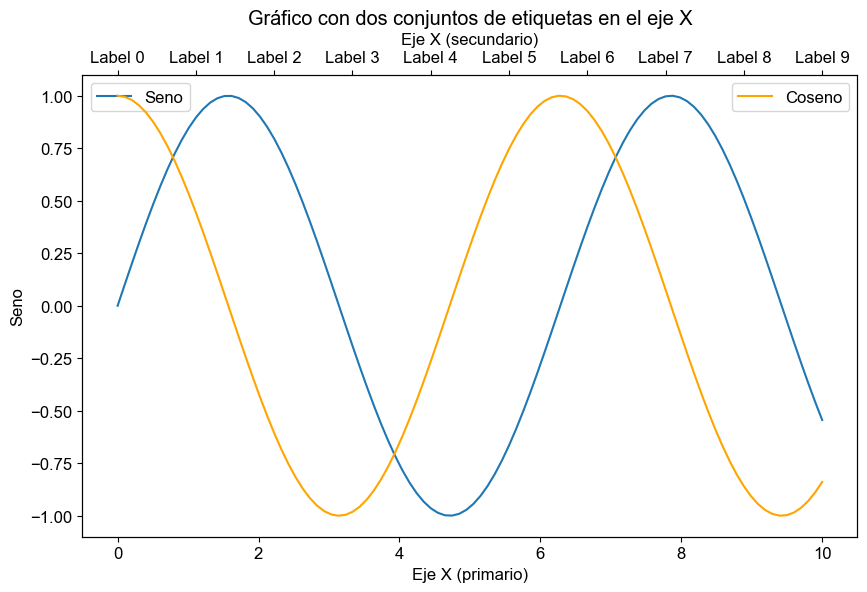

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración global para las fuentes
plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

# Definir tamaño de la figura (ancho, alto) en pulgadas
fig, ax1 = plt.subplots(figsize=(10, 6))

# Datos para el gráfico
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Primer gráfico
ax1.plot(x, y1, label='Seno')
ax1.set_xlabel('Eje X (primario)')
ax1.set_ylabel('Seno')
ax1.set_title('Gráfico con dos conjuntos de etiquetas en el eje X')
ax1.legend(loc='upper left')

# Crear un segundo eje x
ax2 = ax1.twiny()

# Ajustar el segundo eje x para que coincida con el primero
ax2.set_xlim(ax1.get_xlim())

# Definir nuevas etiquetas para el segundo eje x
new_labels = [f'Label {i}' for i in range(len(x)//10)]
new_positions = np.linspace(0, 10, len(new_labels))
ax2.set_xticks(new_positions)
ax2.set_xticklabels(new_labels)
ax2.set_xlabel('Eje X (secundario)')

# Gráfico del coseno en el mismo eje y pero con etiquetas diferentes en el eje x secundario
ax2.plot(x, y2, label='Coseno', color='orange')
ax2.legend(loc='upper right')

plt.show()

<BarContainer object of 9 artists>

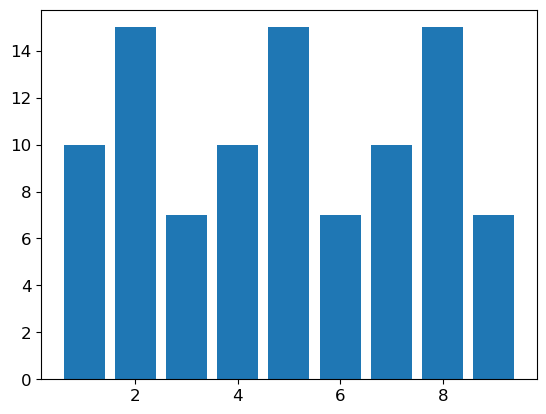

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Supongamos que ya tienes tus datos en x (las barras) y y (sus alturas)
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [10, 15, 7, 10, 15, 7, 10, 15, 7]

# Graficar las barras
plt.bar(x, y)

## Definir los patrones que se repetirán
#patrones = [Patch(facecolor='none', edgecolor='red', hatch='|'),
#            Patch(facecolor='none', edgecolor='blue', hatch='\\'),
#            Patch(facecolor='none', edgecolor='green', hatch='x')]
#
## Agregar los patrones a las barras a partir de la tercera
#for i in range(2, len(x)):
#    if i % 3 == 0:  # Si es una barra múltiplo de 3, agrega un patrón
#        plt.bar(x[i], y[i], color='white', edgecolor=patrones[(i // 3) % len(patrones)].get_edgecolor(), hatch=patrones[(i // 3) % len(patrones)].get_hatch()) 
#    else:
#        plt.bar(x[i], y[i])  # Si no, solo agrega la barra sin patrón
#
## Mostrar el gráfico
#plt.show()

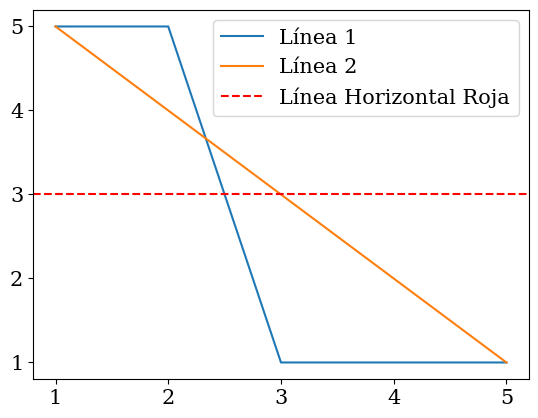

In [289]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y1 = [5, 5, 1, 1,1]


# Graficar los datos
plt.plot(x, y1, label='Línea 1')
plt.plot(x, y2, label='Línea 2')

# Agregar una línea horizontal roja en y=3
plt.axhline(y=3, color='red', linestyle='--', label='Línea Horizontal Roja')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [2]:
import pandas as pd
bins=pd.read_excel('MoRS/Analisis_Resultados/test_Shift/bit_14_intervalos/new intervalos/modelos_sin_fallos_LO_HO afectados/All_Nets_new_bins_test_LO_mask_test_funcion.xlsx',sheet_name='grafic')

Nets_by_bins= bins.set_index("Redes")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
Nets_by_bins
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])



,0,1,2,3,4,5,6,7,8
Redes,,,,,,,,,
AlexNet,0.887096,0.085379,2.396006e-02,0.003364,0.000200,0.000000,0.000000e+00,0.000000,0.000000
DenseNet,0.777219,0.179270,4.161862e-02,0.001892,0.000000,0.000000,0.000000e+00,0.000000,0.000000
Inception,0.836512,0.138102,2.367750e-02,0.001403,0.000268,0.000037,9.208684e-07,0.000000,0.000000
MobileNet,0.886727,0.095505,1.650305e-02,0.001265,0.000000,0.000000,0.000000e+00,0.000000,0.000000
ResNet,0.988640,0.007694,2.699938e-03,0.000943,0.000023,0.000000,0.000000e+00,0.000000,0.000000
SqueezeNet,0.964894,0.022272,8.065032e-03,0.003628,0.000965,0.000152,2.428095e-05,0.000000,0.000000
VGG16,0.999995,0.000005,9.702922e-08,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
VGG19,0.623585,0.062861,6.911036e-02,0.069565,0.072500,0.056974,3.214836e-02,0.012275,0.000983
Xception,0.813113,0.119110,4.545805e-02,0.016100,0.005336,0.000750,1.094871e-04,0.000021,0.000000


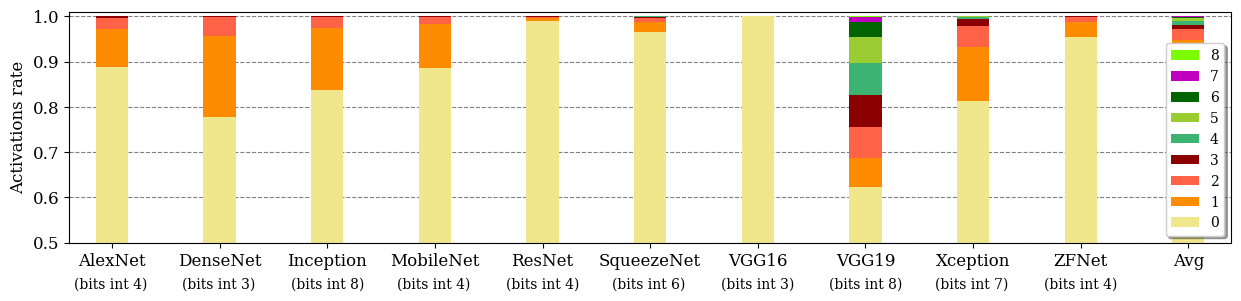

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
import matplotlib as mpl
import plotly.graph_objects as go
mpl.rcParams['font.family']='serif'

n = len(Nets_by_bins.index)

x_pos = [0,0,5,8,9]
#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,4)
y=[1,1,1,1,1,1,1]
#coloresRedes = ['green', 'red','dodgerblue']

coloresRedes = [ 'khaki', 'darkorange','tomato','darkred','mediumseagreen', 'yellowgreen','darkgreen','#BF00BF','#7CFC00']
#coloresRedes = [ 'gold', 'darkorange','tomato','red','mediumseagreen', 'green','darkgreen']
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

bars=Nets_by_bins.plot(kind ='bar',stacked = True,width = 0.30, color = coloresRedes, fontsize=12,
                          figsize=(15,3),  zorder=2,)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Activations rate', fontsize=12, fontfamily="serif")
plt.xticks(x, Nets_by_bins.index, fontsize= 12, rotation = 0, fontfamily="serif" )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0.5,1.01)

#plt.xticks(rotation = 0, fontsize= 12)
plt.yticks(rotation = 0, fontsize=12)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')

handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [8,7,6,5,4,3,2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=10,loc="lower right",shadow = True)
## colocar leyenda horizontal
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=14,ncol=5, columnspacing=0.9,shadow = True)



plt.text(-0.35, 0.4, '(bits int 4) ', fontsize=10, fontfamily="serif")
plt.text(0.65, 0.4, '(bits int 3)', fontsize=10, fontfamily="serif")
plt.text(1.66, 0.4, '(bits int 8)', fontsize=10, fontfamily="serif")
plt.text(2.65, 0.4, '(bits int 4)', fontsize=10, fontfamily="serif")
plt.text(3.66,0.4, '(bits int 4)', fontsize=10, fontfamily="serif")
plt.text(4.65,0.4, '(bits int 6)', fontsize=10, fontfamily="serif")
plt.text(5.66, 0.4, '(bits int 3)', fontsize=10, fontfamily="serif")
plt.text(6.66, 0.4, '(bits int 8)', fontsize=10, fontfamily="serif")
plt.text(7.65,0.4,'(bits int 7)' , fontsize=10, fontfamily="serif")
plt.text(8.66, 0.4, '(bits int 4)', fontsize=10, fontfamily="serif")

#
#plt.axvline(x=2.5, ymax= 5, color="black",linewidth=0.5)#Alex
#plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#Dense
#plt.axvline(x=8.5, ymax= 5, color="black",linewidth=0.5)#inc
#plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#mobil
#plt.axvline(x=14.5, ymax= 5, color="black",linewidth=0.5)#res
#plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#sque
#plt.axvline(x=20.5, ymax= 5, color="black",linewidth=0.5)#vgg16
#plt.axvline(x=23.5, ymax= 5, color="black",linewidth=0.5)#vgg19
#plt.axvline(x=26.5, ymax= 5, color="black",linewidth=0.5)#xcep
#plt.axvline(x=29.5, ymax= 5, color="black",linewidth=0.5)#zf
plt.savefig('Bins_actvs_stacked_other_colors.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)


In [2]:
import pandas as pd
bins_by_zeros=pd.read_excel('MoRS/Analisis_Resultados/test_Shift/bit_14_intervalos/new intervalos/modelos_sin_fallos_LO_HO afectados/All_Nets_new_bins_test_LO_mask_test_funcion.xlsx',sheet_name='Graficado')

Nets_by_bins_by_zeros= bins_by_zeros.set_index("Redes")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
Nets_by_bins_by_zeros
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])


,0,1,2,3,4,5,6,7,8
Redes,,,,,,,,,
AlexNet,0.000200,3.364260e-03,2.396006e-02,0.085379,0.887096,0.000000,NaN,NaN,NaN
DenseNet,0.001892,4.161862e-02,1.792703e-01,0.777219,NaN,NaN,NaN,NaN,NaN
Inception,0.000000,0.000000e+00,9.208684e-07,0.000037,0.000268,0.001403,0.023678,0.138102,0.836512
MobileNet,0.000000,1.264742e-03,1.650305e-02,0.095505,0.886727,NaN,NaN,NaN,NaN
ResNet,0.000023,9.427882e-04,2.699938e-03,0.007694,0.988640,NaN,NaN,NaN,NaN
SqueezeNet,0.000024,1.524821e-04,9.645043e-04,0.003628,0.008065,0.022272,0.964894,NaN,NaN
VGG16,0.000000,9.702922e-08,4.897866e-06,0.999995,NaN,NaN,NaN,NaN,NaN
VGG19,0.000983,1.227476e-02,3.214836e-02,0.056974,0.072500,0.069565,0.069110,0.062861,0.623585
Xception,0.000021,1.094871e-04,7.495478e-04,0.005336,0.016100,0.045458,0.119110,0.813113,NaN


Text(8.66, 0.4, '(bits int 4)')

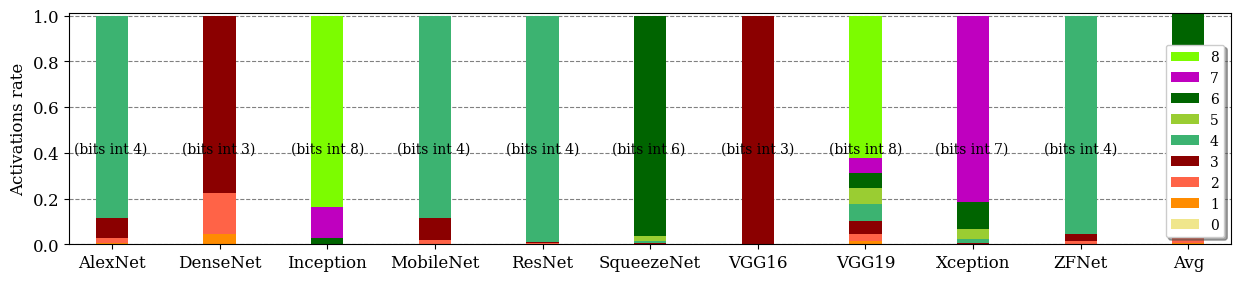

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
import matplotlib as mpl
import plotly.graph_objects as go
mpl.rcParams['font.family']='serif'

n = len(Nets_by_bins_by_zeros.index)

x_pos = [0,0,5,8,9]
#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,4)
y=[1,1,1,1,1,1,1]
#coloresRedes = ['green', 'red','dodgerblue']

coloresRedes = [ 'khaki', 'darkorange','tomato','darkred','mediumseagreen', 'yellowgreen','darkgreen','#BF00BF','#7CFC00']
#coloresRedes = [ 'gold', 'darkorange','tomato','red','mediumseagreen', 'green','darkgreen']
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

bars=Nets_by_bins_by_zeros.plot(kind ='bar',stacked = True,width = 0.30, color = coloresRedes, fontsize=12,
                          figsize=(15,3),  zorder=2,)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Activations rate', fontsize=12, fontfamily="serif")
plt.xticks(x, Nets_by_bins_by_zeros.index, fontsize= 12, rotation = 0, fontfamily="serif" )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0,1.01)

#plt.xticks(rotation = 0, fontsize= 12)
plt.yticks(rotation = 0, fontsize=12)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')

handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [8,7,6,5,4,3,2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=10,loc="lower right",shadow = True)
## colocar leyenda horizontal
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=14,ncol=5, columnspacing=0.9,shadow = True)



plt.text(-0.35, 0.4, '(bits int 4) ', fontsize=10, fontfamily="serif")
plt.text(0.65, 0.4, '(bits int 3)', fontsize=10, fontfamily="serif")
plt.text(1.66, 0.4, '(bits int 8)', fontsize=10, fontfamily="serif")
plt.text(2.65, 0.4, '(bits int 4)', fontsize=10, fontfamily="serif")
plt.text(3.66,0.4, '(bits int 4)', fontsize=10, fontfamily="serif")
plt.text(4.65,0.4, '(bits int 6)', fontsize=10, fontfamily="serif")
plt.text(5.66, 0.4, '(bits int 3)', fontsize=10, fontfamily="serif")
plt.text(6.66, 0.4, '(bits int 8)', fontsize=10, fontfamily="serif")
plt.text(7.65,0.4,'(bits int 7)' , fontsize=10, fontfamily="serif")
plt.text(8.66, 0.4, '(bits int 4)', fontsize=10, fontfamily="serif")

#
#plt.axvline(x=2.5, ymax= 5, color="black",linewidth=0.5)#Alex
#plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#Dense
#plt.axvline(x=8.5, ymax= 5, color="black",linewidth=0.5)#inc
#plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#mobil
#plt.axvline(x=14.5, ymax= 5, color="black",linewidth=0.5)#res
#plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#sque
#plt.axvline(x=20.5, ymax= 5, color="black",linewidth=0.5)#vgg16
#plt.axvline(x=23.5, ymax= 5, color="black",linewidth=0.5)#vgg19
#plt.axvline(x=26.5, ymax= 5, color="black",linewidth=0.5)#xcep
#plt.axvline(x=29.5, ymax= 5, color="black",linewidth=0.5)#zf
#plt.savefig('Bins_actvs_stacked_other_colors.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)


In [7]:
import pandas as pd
bins_by_zeros_reverse=pd.read_excel('MoRS/Analisis_Resultados/test_Shift/bit_14_intervalos/new intervalos/modelos_sin_fallos_LO_HO afectados/All_Nets_new_bins_test_LO_mask_test_funcion.xlsx',sheet_name='Graficado_reverse')

bins_by_zeros_reverse= bins_by_zeros_reverse.set_index("Redes")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
bins_by_zeros_reverse
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])


,0,1,2,3,4,5,6,7,8
Redes,,,,,,,,,
AlexNet,0.000200,3.364260e-03,2.396006e-02,0.085379,0.887096,0.000000,NaN,NaN,NaN
DenseNet,0.001892,4.161862e-02,1.792703e-01,0.777219,NaN,NaN,NaN,NaN,NaN
Inception,0.000000,0.000000e+00,9.208684e-07,0.000037,0.000268,0.001403,0.023678,0.138102,0.836512
MobileNet,0.000000,1.264742e-03,1.650305e-02,0.095505,0.886727,NaN,NaN,NaN,NaN
ResNet,0.000023,9.427882e-04,2.699938e-03,0.007694,0.988640,NaN,NaN,NaN,NaN
SqueezeNet,0.000024,1.524821e-04,9.645043e-04,0.003628,0.008065,0.022272,0.964894,NaN,NaN
VGG16,0.000000,9.702922e-08,4.897866e-06,0.999995,NaN,NaN,NaN,NaN,NaN
VGG19,0.000983,1.227476e-02,3.214836e-02,0.056974,0.072500,0.069565,0.069110,0.062861,0.623585
Xception,0.000021,1.094871e-04,7.495478e-04,0.005336,0.016100,0.045458,0.119110,0.813113,NaN


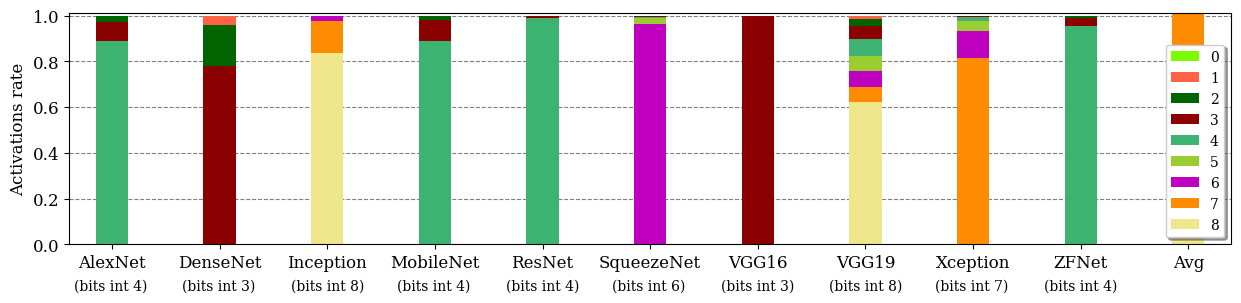

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
import matplotlib as mpl
import plotly.graph_objects as go
mpl.rcParams['font.family']='serif'

n = len(bins_by_zeros_reverse.index)

x_pos = [0,0,5,8,9]
#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,4)
y=[1,1,1,1,1,1,1]
#coloresRedes = ['green', 'red','dodgerblue']

coloresRedes = [ 'khaki', 'darkorange','#BF00BF','yellowgreen','mediumseagreen', 'darkred','darkgreen','tomato','#7CFC00']
#coloresRedes = [ 'gold', 'darkorange','tomato','red','mediumseagreen', 'green','darkgreen']
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

bars=bins_by_zeros_reverse.plot(kind ='bar',stacked = True,width = 0.30, color = coloresRedes, fontsize=12,
                          figsize=(15,3),  zorder=2,)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Activations rate', fontsize=12, fontfamily="serif")
plt.xticks(x, bins_by_zeros_reverse.index, fontsize= 12, rotation = 0, fontfamily="serif" )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0,1.01)

#plt.xticks(rotation = 0, fontsize= 12)
plt.yticks(rotation = 0, fontsize=12)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')

handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [8,7,6,5,4,3,2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=10,loc="lower right",shadow = True)
## colocar leyenda horizontal
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=14,ncol=5, columnspacing=0.9,shadow = True)



plt.text(-0.35, -0.2, '(bits int 4) ', fontsize=10, fontfamily="serif")
plt.text(0.65, -0.2, '(bits int 3)', fontsize=10, fontfamily="serif")
plt.text(1.66, -0.2, '(bits int 8)', fontsize=10, fontfamily="serif")
plt.text(2.65, -0.2, '(bits int 4)', fontsize=10, fontfamily="serif")
plt.text(3.66,-0.2, '(bits int 4)', fontsize=10, fontfamily="serif")
plt.text(4.65,-0.2, '(bits int 6)', fontsize=10, fontfamily="serif")
plt.text(5.66, -0.2, '(bits int 3)', fontsize=10, fontfamily="serif")
plt.text(6.66, -0.2, '(bits int 8)', fontsize=10, fontfamily="serif")
plt.text(7.65,-0.2,'(bits int 7)' , fontsize=10, fontfamily="serif")
plt.text(8.66, -0.2, '(bits int 4)', fontsize=10, fontfamily="serif")

#
#plt.axvline(x=2.5, ymax= 5, color="black",linewidth=0.5)#Alex
#plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#Dense
#plt.axvline(x=8.5, ymax= 5, color="black",linewidth=0.5)#inc
#plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#mobil
#plt.axvline(x=14.5, ymax= 5, color="black",linewidth=0.5)#res
#plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#sque
#plt.axvline(x=20.5, ymax= 5, color="black",linewidth=0.5)#vgg16
#plt.axvline(x=23.5, ymax= 5, color="black",linewidth=0.5)#vgg19
#plt.axvline(x=26.5, ymax= 5, color="black",linewidth=0.5)#xcep
#plt.axvline(x=29.5, ymax= 5, color="black",linewidth=0.5)#zf
plt.savefig('Bins_actvs_stacked_other_colors_zeros.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)


In [42]:
import pandas as pd
ACC_tech=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time\Acc_Mors_All_Nets_0_53/ACC_all_Experiment_all_model_053.xlsx',sheet_name='grafic')

ACC_tech= ACC_tech.set_index("redes")
ACC_tech

,Base,F+P,S+P,SP+S
redes,,,,
AlexNet,0.205539,1.001497,1.002395,0.998952
DenseNet,0.132555,0.999854,1.002628,0.999854
Inception,0.165414,0.356391,0.776441,0.943358
Mobilenet,0.139183,0.836914,0.899697,0.992890
ResNet,0.317734,0.979803,1.000000,0.995074
SqueezeNet,0.134097,0.153152,0.480516,1.001003
VGG16,0.145695,0.272351,0.781291,1.000166
VGG19,0.233051,0.990254,0.990678,1.000847
Xception,0.146018,0.146018,0.806195,0.996018


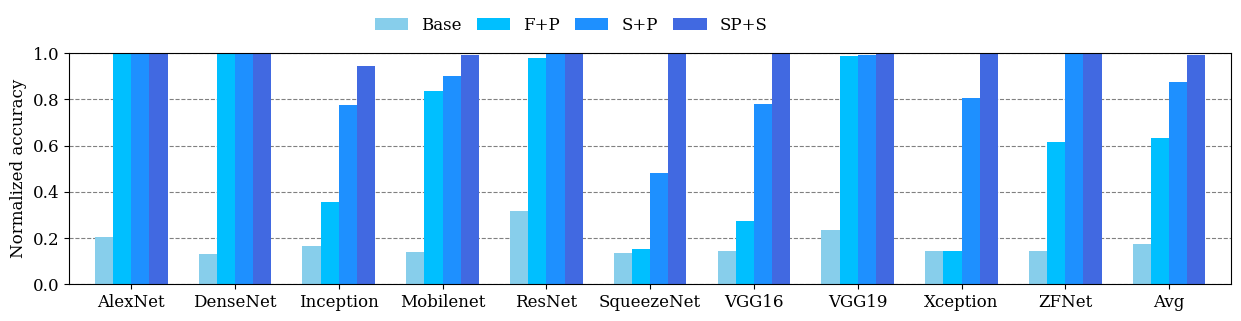

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
n = len(ACC_tech.index)

 
x = np.arange(n)
coloresRedes = ['skyblue', 'deepskyblue','dodgerblue','royalblue', ]
#coloresRedes = ['gold', 'darkorange','tomato','mediumseagreen', ]
#coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(20,5), dpi=100)

ACC_tech.plot(kind ='bar', width = 0.70, fontsize=12, color = coloresRedes, figsize=(15,3), zorder=2 );
#plt.legend(  fontsize=10, loc ="lower left",bbox_to_anchor=(0.1,0.1), shadow = True)
lg = plt.legend(  fontsize=12, loc ="lower left",bbox_to_anchor=(0.25,1.02), shadow = False, ncol=5, columnspacing=0.9)
lg.draw_frame(False)
#plt.legend(  fontsize=11, bbox_to_anchor=(0.653,0.2),shadow = True)
plt.ylim(0,1.0)
plt.ylabel('Normalized accuracy', fontsize=12, fontfamily="serif")
plt.xlabel('')
plt.xticks(x, ACC_tech.index, fontsize= 12, fontfamily="serif")
plt.xticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
plt.savefig('Mors_summary_acc_exp_all_nets_.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#pdfFile=PdfPages("Analizando_fichero_detalle\Alterado_fichero\concretando análisis\gráficos\Resumen_acc_experimentos.pdf")
#pdfFile.savefig(fig, transparent = True, bbox_inches = 'tight', pad_inches = 0)
#pdfFile.close()


In [35]:
import pandas as pd
acc_by_tech=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols.xlsx',sheet_name='Hoja3', usecols=["Redes","Tecnic" ,"0.53 V","0.52 V","0.51 V"])
#acc_by_tech= acc_by_tech.set_index("Redes")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
#acc_by_tech
#df = pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols.xlsx',sheet_name='Hoja2')
df = pd.DataFrame(acc_by_tech)
print(df['Redes'])

0          Alex
1           NaN
2           NaN
3         Dense
4           NaN
5           NaN
6     Inception
7           NaN
8           NaN
9        Mobile
10          NaN
11          NaN
12          Res
13          NaN
14          NaN
15      Squeeze
16          NaN
17          NaN
18        VGG16
19          NaN
20          NaN
21        VGG19
22          NaN
23          NaN
24     Xception
25          NaN
26          NaN
27           ZF
28          NaN
29          NaN
30          Avg
31          NaN
32          NaN
Name: Redes, dtype: object


3
range(0, 33)


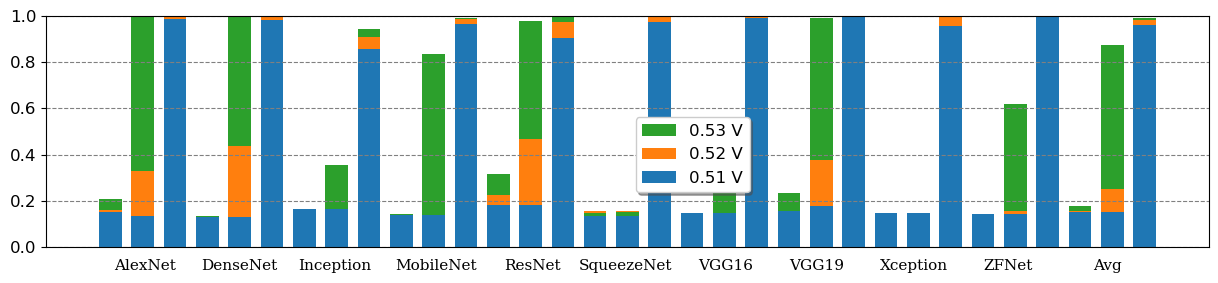

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes tres DataFrames llamados df1, df2 y df3, con la misma estructura

# Creamos un DataFrame con datos ficticios para ilustrar el ejemplo
#data1 = {'Categoría': ['A', 'B', 'C'], 'Valor': [10, 20, 30]}
#data2 = {'Categoría': ['A', 'B', 'C'], 'Valor': [15, 25, 35]}
#data3 = {'Categoría': ['A', 'B', 'C'], 'Valor': [12, 22, 32]}

#df1 = pd.DataFrame(vol_53)
#df2 = pd.DataFrame(vol_52)
#df3 = pd.DataFrame(vol_51)

# Creamos una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(15, 3))
plt.rc('font', size=12)

# Definimos la cantidad de barras
n = len(df1)
n_groups = n // 3
print(n_groups)

# Ancho de las barras
width = 0.7
plt.ylim(0,1.0)
# Índices para la posición de las barras
#n= vol_53.set_index(df['redes']"re)
#vol_53
ind = range(33)
print(ind)
hatches = ['/', '\\', '|']
# Graficamos los datos de cada DataFrame


ax.bar(ind, df['0.53 V'], width, label='0.51 V')
ax.bar(ind, df['0.52 V'], width, bottom=df['0.53 V'], label='0.52 V')
ax.bar(ind, df['0.51 V'], width, bottom=df['0.53 V']+df['0.52 V'], label='0.53 V')

#for i in range(n_groups):
#    bottom_offset = i * 3 * width
#    hatch_index = i % len(hatches)  # Para seleccionar el patrón correcto
#    ax.bar(ind + i * width, df1['Valor'][i*3:i*3+3], width, label='DF1', bottom=bottom_offset, hatch=hatches[hatch_index])
#    ax.bar(ind + i * width, df2['Valor'][i*3:i*3+3], width, label='DF2', bottom=bottom_offset, hatch=hatches[hatch_index])
#    ax.bar(ind + i * width, df3['Valor'][i*3:i*3+3], width, label='DF3', bottom=bottom_offset, hatch=hatches[hatch_index])


#for i in range(n_groups):
#    print(i)
#    bottom_offset = i * 3 * width
#    ax.bar(ind + i * width, df['0.53 V'][i*3:i*3+3], width, label='DF1', bottom=bottom_offset)
#    ax.bar(ind + i * width, df['0.52 V'][i*3:i*3+3], width, label='DF2', bottom=bottom_offset)
#    ax.bar(ind + i * width, df['0.51 V'][i*3:i*3+3], width, label='DF3', bottom=bottom_offset)

# Configuramos las etiquetas de las categorías en el eje x

#ax.set_xticklabels(df1['Categoría'])


# Configuramos las etiquetas de las categorías en el eje x
#ax.set_xticks(ind,fontsize= 30, fontfamily="serif")
##ax.set_xticklabels(df['Redes'],fontsize= 12, fontfamily="serif")
#
#
# Añadimos leyenda
ax.legend()
ax.set_xticks([])
handles, labels = plt.gca().get_legend_handles_labels()
##specify order of items in legend
order = [2,1,0]
##add legend to plot
legend1=plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=12,loc ="lower left",
           bbox_to_anchor=(0.5,0.2),shadow = True)

plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
# Mostramos el gráfico

plt.text(0.1, -0.1, 'AlexNet', fontsize=11, fontfamily="serif")
plt.text(2.8, -0.1, 'DenseNet', fontsize=11, fontfamily="serif")
plt.text(5.8, -0.1, 'Inception', fontsize=11, fontfamily="serif")
plt.text(8.8, -0.1, 'MobileNet', fontsize=11, fontfamily="serif")
plt.text(12.2, -0.1, 'ResNet', fontsize=11, fontfamily="serif")
plt.text(14.5,-0.1, 'SqueezeNet', fontsize=11, fontfamily="serif")
plt.text(18.2, -0.1, 'VGG16', fontsize=11, fontfamily="serif")
plt.text(21.0, -0.1, 'VGG19', fontsize=11, fontfamily="serif")
plt.text(23.8, -0.1,'Xception' , fontsize=11, fontfamily="serif")
plt.text(27.0, -0.1, 'ZFNet', fontsize=11, fontfamily="serif")
plt.text(30.4, -0.1, 'Avg', fontsize=11, fontfamily="serif")
plt.show()

3
range(0, 33)


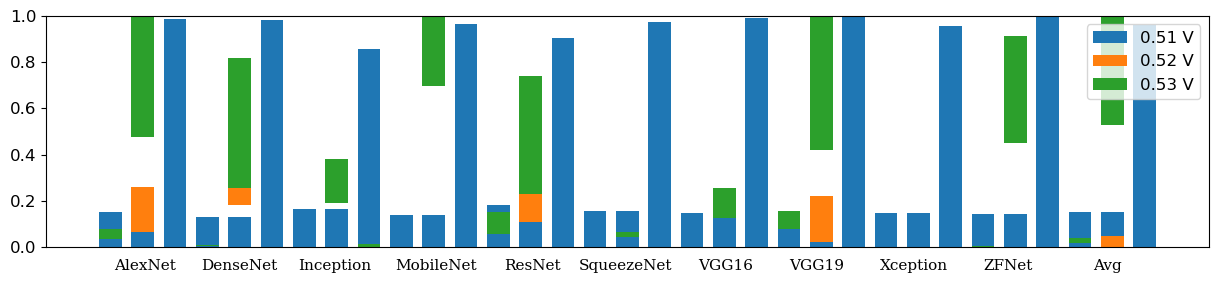

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes tres DataFrames llamados df1, df2 y df3, con la misma estructura

# Creamos un DataFrame con datos ficticios para ilustrar el ejemplo
#data1 = {'Categoría': ['A', 'B', 'C'], 'Valor': [10, 20, 30]}
#data2 = {'Categoría': ['A', 'B', 'C'], 'Valor': [15, 25, 35]}
#data3 = {'Categoría': ['A', 'B', 'C'], 'Valor': [12, 22, 32]}

df1 = pd.DataFrame(vol_53)
df2 = pd.DataFrame(vol_52)
df3 = pd.DataFrame(vol_51)

# Creamos una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(15, 3))
plt.rc('font', size=12)

# Definimos la cantidad de barras
n = len(df1)
n_groups = n // 3
print(n_groups)

# Ancho de las barras
width = 0.7
plt.ylim(0,1.0)
# Índices para la posición de las barras
#n= vol_53.set_index(df['redes']"re)
#vol_53
ind = range(33)
print(ind)
hatches = ['/', '\\', '|']
# Graficamos los datos de cada DataFrame




ax.bar(ind, df['0.51 V'], width, label='0.51 V')
ax.bar(ind, df['0.52 V'], width, bottom=df['0.52 V']-df['0.51 V'], label='0.52 V')
ax.bar(ind, df['0.53 V'], width, bottom=df['0.53 V']-df['0.52 V'], label='0.53 V')

#for i in range(n_groups):
#    bottom_offset = i * 3 * width
#    hatch_index = i % len(hatches)  # Para seleccionar el patrón correcto
#    ax.bar(ind + i * width, df1['Valor'][i*3:i*3+3], width, label='DF1', bottom=bottom_offset, hatch=hatches[hatch_index])
#    ax.bar(ind + i * width, df2['Valor'][i*3:i*3+3], width, label='DF2', bottom=bottom_offset, hatch=hatches[hatch_index])
#    ax.bar(ind + i * width, df3['Valor'][i*3:i*3+3], width, label='DF3', bottom=bottom_offset, hatch=hatches[hatch_index])


#for i in range(n_groups):
#    print(i)
#    bottom_offset = i * 3 * width
#    ax.bar(ind + i * width, df['0.53 V'][i*3:i*3+3], width, label='DF1', bottom=bottom_offset)
#    ax.bar(ind + i * width, df['0.52 V'][i*3:i*3+3], width, label='DF2', bottom=bottom_offset)
#    ax.bar(ind + i * width, df['0.51 V'][i*3:i*3+3], width, label='DF3', bottom=bottom_offset)

# Configuramos las etiquetas de las categorías en el eje x

#ax.set_xticklabels(df1['Categoría'])


# Configuramos las etiquetas de las categorías en el eje x
#ax.set_xticks(ind,fontsize= 30, fontfamily="serif")
##ax.set_xticklabels(df['Redes'],fontsize= 12, fontfamily="serif")
#
#
# Añadimos leyenda
ax.legend()
ax.set_xticks([])
handles, labels = plt.gca().get_legend_handles_labels()
##specify order of items in legend
#order = [2,1,0]
###add legend to plot
#legend1=plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=12,loc ="lower left",
#           bbox_to_anchor=(0.01,0.5),shadow = True)
#
#plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
# Mostramos el gráfico

plt.text(0.1, -0.1, 'AlexNet', fontsize=11, fontfamily="serif")
plt.text(2.8, -0.1, 'DenseNet', fontsize=11, fontfamily="serif")
plt.text(5.8, -0.1, 'Inception', fontsize=11, fontfamily="serif")
plt.text(8.8, -0.1, 'MobileNet', fontsize=11, fontfamily="serif")
plt.text(12.2, -0.1, 'ResNet', fontsize=11, fontfamily="serif")
plt.text(14.5,-0.1, 'SqueezeNet', fontsize=11, fontfamily="serif")
plt.text(18.2, -0.1, 'VGG16', fontsize=11, fontfamily="serif")
plt.text(21.0, -0.1, 'VGG19', fontsize=11, fontfamily="serif")
plt.text(23.8, -0.1,'Xception' , fontsize=11, fontfamily="serif")
plt.text(27.0, -0.1, 'ZFNet', fontsize=11, fontfamily="serif")
plt.text(30.4, -0.1, 'Avg', fontsize=11, fontfamily="serif")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
n = len(ACC_tech.index)

 
x = np.arange(n)
coloresRedes = ['skyblue', 'deepskyblue','dodgerblue','royalblue', ]
#coloresRedes = ['gold', 'darkorange','tomato','mediumseagreen', ]
#coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(20,5), dpi=100)

ACC_tech.plot(kind ='bar', width = 0.70, fontsize=12, color = coloresRedes, figsize=(15,3), zorder=2 );
#plt.legend(  fontsize=10, loc ="lower left",bbox_to_anchor=(0.1,0.1), shadow = True)
lg = plt.legend(  fontsize=12, loc ="lower left",bbox_to_anchor=(0.25,1.02), shadow = False, ncol=5, columnspacing=0.9)
lg.draw_frame(False)
#plt.legend(  fontsize=11, bbox_to_anchor=(0.653,0.2),shadow = True)
plt.ylim(0,1.0)
plt.ylabel('Normalized accuracy', fontsize=12, fontfamily="serif")
plt.xlabel('')
plt.xticks(x, ACC_tech.index, fontsize= 12, fontfamily="serif")
plt.xticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
plt.savefig('Mors_summary_acc_exp_all_nets_.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#pdfFile=PdfPages("Analizando_fichero_detalle\Alterado_fichero\concretando análisis\gráficos\Resumen_acc_experimentos.pdf")
#pdfFile.savefig(fig, transparent = True, bbox_inches = 'tight', pad_inches = 0)
#pdfFile.close()